<a href="https://colab.research.google.com/github/boernd/tf-in-practice/blob/master/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
import tensorflow.keras.regularizers as kr
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-04-24 18:45:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-24 18:45:43 (113 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [13]:
model = Sequential()
model.add(Embedding(input_dim=total_words,output_dim=120,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=256))
model.add(Dense(units=total_words/3, activation='relu', kernel_regularizer=kr.l2(0.01)))
model.add(Dense(units=total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 120)           385320    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 256)           254976    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_8 (Dense)              (None, 1070)              274990    
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              3438981   
Total params: 4,879,579
Trainable params: 4,879,579
Non-trainable params: 0
____________________________________________

In [14]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 11ms/step - loss: 7.0478 - accuracy: 0.0228
Epoch 2/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4992 - accuracy: 0.0224
Epoch 3/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4094 - accuracy: 0.0243
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3012 - accuracy: 0.0285
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1863 - accuracy: 0.0296
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0937 - accuracy: 0.0389
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0060 - accuracy: 0.0404
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9256 - accuracy: 0.0433
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8337 - accuracy: 0.0509
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 5.727

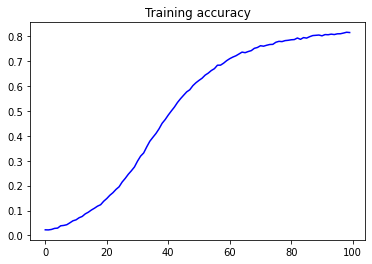

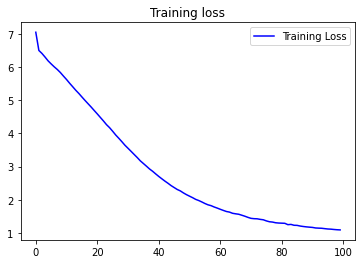

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that eyes is worth doth stand still new in it one can thee old free near free near taken show thee young thy rhyme gain by appetite i do dead gone dyed dead part bearing many a worthless fading place ride at base men height forth me by night mad new shade remember'd better pride pluck them back by outworn told a scope and rich prove spent pride new end see lie in a hell of hell his part new cold brought of character or rare rare burn night dyed dyed dyed quite much treason cold end aside taken shine
